In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Ordinary Least-Squares Regression for Linear System (Hyperplane)

References:
- http://mezeylab.cb.bscb.cornell.edu/labmembers/documents/supplement%205%20-%20multiple%20regression.pdf
- https://en.wikipedia.org/wiki/Projection_matrix

Each desired value $y_i$ can be predicted by some combination of observed values $x_j$:

$$y_i = \sum_j x_{ij} w_j + b_i$$

The coefficients can be estimated with training data via:

$$\textbf{w}=(\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{y}$$



In [2]:
def hyperplane_fit(y=None, X=None, data=None, y_name=None):
    """
    Perform a least squares fit to y = w0*x0 + w1*x1 + ... + b

    Parameters
    ----------
    y : array-like shape (n_observations)
    X : array-like shape (n_observations, n_variables)
    data : dataframe shape (n_observations, n_variables + 1)
    y_name : string

    Returns
    -------
    w : pd.Series shape (n_variables)
        Weights
    b : float
        Offset
    """
    # Variable extraction
    if (data is not None) and (y_name is not None):
        y = data[y_name].values
        names = [c for c in data.columns if c != y_name]
        X = data.loc[:, names].values
    else:
        if isinstance(y, pd.Series):
            y = y.values
        if isinstance(X, pd.DataFrame):
            names = X.columns.values
            X = X.values
        else:
            names = np.arange(X.shape[1])
    # Add ones to the last column for the constant offset
    X1 = np.hstack([X, np.ones(X.shape[0])[:, np.newaxis]])
    # Ordinary least squares fit
    coeff = np.dot(np.dot(np.linalg.inv(np.dot(X1.T, X1)), X1.T), y)
    w = pd.Series(coeff[:X.shape[1]], index=names)
    offset = coeff[-1]
    return w, offset

# Try with synthetic data

In [3]:
data = pd.DataFrame({'x0': np.random.poisson(10, 1000), 
                     'x1': np.random.poisson(10, 1000)}, dtype=float)
data['y'] = data.sum(axis=1) + np.random.normal(0, 1, len(data))
data.head()

,x0,x1,y
0,6.0,12.0,16.591820
1,10.0,8.0,18.209619
2,11.0,9.0,18.840562
3,3.0,5.0,7.154965
4,9.0,10.0,20.075139


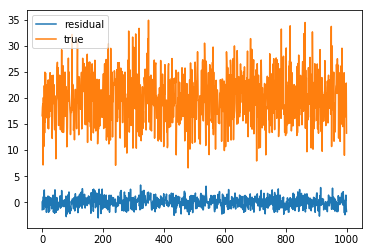

In [4]:
y = data.loc[:, 'y'].values
X = data.loc[:, 'x0':'x1'].values
w, b = hyperplane_fit(y, X)
resd = y - (np.dot(X, w) + b)
plot(resd, label='residual')
plot(y, label='true')
legend()

In [5]:
w2, b2 = hyperplane_fit(y_name='y', data=data)
assert np.array_equal(w2.values, w.values)
assert np.array_equal(b2, b)